## Pandas - DataFrames

Probably the most important data structure of pandas is the `DataFrame`. It's a tabular structure tightly integrated with `Series`. 
A `DataFrame` is a collection of `Series` objects that share the same index. Each column in a `DataFrame` is a `Series`, and each row is an index. The `DataFrame` is similar to a table in a database or an Excel spreadsheet.

In [804]:
import numpy as np
import pandas as pd

We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table (as the one you can appreciate [here](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?gid=0#gid=0)):

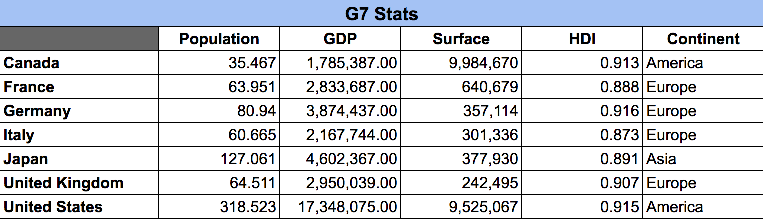

Creating DataFrames manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csv file or the web. But still, you can create a DataFrame by specifying the columns and values:

In [805]:
df = pd.DataFrame(
    {
        "Population": [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
        "GDP": [1785387, 2833687, 3874437, 2167744, 4602367, 2950039, 17348075],
        "Surface Area": [9984670, 640679, 357114, 301336, 377930, 242495, 9525067],
        "HDI": [0.913, 0.888, 0.916, 0.873, 0.891, 0.907, 0.915],
        "Continent": [
            "America",
            "Europe",
            "Europe",
            "Europe",
            "Asia",
            "Europe",
            "America",
        ],
    },
    # columns=["Population", "GDP", "Surface Area", "HDI", "Continent"],
    # index = [
    #     "Canada",
    #     "Germany",
    #     "France",
    #     "Italy",
    #     "Japan",
    #     "United Kingdom",
    #     "United States",
    # ],
    )

(The columns attribute is optional. I'm using it to keep the same order as in the picture above)

In [806]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


DataFrames also have indexes. As you can see in the "table" above, pandas has assigned a numeric, autoincremental index automatically to each "row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [807]:
df.index = [
    "Canada",
    "France",
    "Germany",
    "Italy",
    "Japan",
    "United Kingdom",
    "United States",
]

In [808]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [809]:
df.columns # checking the columns of the dataframe

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [810]:
df.head() # checking the first 5 rows of the dataframe (mostly used for large dataframes)

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia


Checking the info of the dataframe, its important to see the data types of each column and also potencial to check missing values.

In [811]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


Checking the size of the dataframe, we can see that we have 7 rows and 5 columns. The shape attribute returns a tuple with the number of rows and columns in the DataFrame. Will result (7, 5) in our case. The size attribute returns the number of elements in the DataFrame. Will result 35 in our case (7 rows * 5 columns). The len() function returns the number of rows in the DataFrame. Will result 7 in our case.

In [812]:
df.size # checking the size of the dataframe (number of elements in the dataframe) 

35

In [813]:
df.shape

(7, 5)

With `describe` we can get a summary of the DataFrame. It will return a new DataFrame with the count, mean, standard deviation, min, max and percentiles of each column. The `describe` method only works with numeric columns. If you want to include non-numeric columns, you can use the `include` parameter. For example, `df.describe(include='all')` will include all columns in the summary. You can also specify a list of data types to include. For example, `df.describe(include=[np.number, 'object'])` will include numeric and object columns in the summary.

In [814]:
df.describe() # checking the summary statistics of the dataframe (only for numeric columns)

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [815]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

With the `value_counts` method we can get the unique values of a column and their counts. This is useful to check the distribution of categorical variables. For example, in our case we can see that the most common continent is Europe, with 4 countries. The second most common continent is North America, with 2 countries. The third most common continent is Asia, with 1 country. The `value_counts` method returns a Series with the unique values as index and their counts as values. You can also use the `normalize` parameter to get the relative frequencies instead of the counts. For example, `df['Continent'].value_counts(normalize=True)` will return the relative frequencies of each continent.

In [816]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
Name: count, dtype: int64

---

### Indexing, Selection and Slicing

Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a `Series`:

In [817]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [818]:
df.loc["Canada"] # to get the row with index "Canada" (using loc method)

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [819]:
df.iloc[-1] # to get index by order number (using iloc method)

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [820]:
df["Population"] # to get column "Population" (using column name)

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

Note that the `index` of the returned Series is the same as the DataFrame one. And its `name` is the name of the column. If you're working on a notebook and want to see a more DataFrame-like format you can use the `to_frame` method:

In [821]:
df["Population"].to_frame() # to see the column as a dataframe (using to_frame method)s

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


Multiple columns can also be selected similarly to `numpy` and `Series`:

In [822]:
df[["Population", "GDP"]]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In this case, the result is another `DataFrame`. Slicing works differently, it acts at "row level", and can be counter intuitive:

In [823]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


Row level selection works better with `loc` and `iloc` which are recommended over regular "direct slicing" (`df[:]`).

`loc` selects rows matching the given index:

In [824]:
df.loc["Italy"]

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [825]:
df.loc[
    "France":"Italy"
]  # to get the rows from France to Italy (inclusive) (using loc method)

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


As a second "argument", you can pass the column(s) you'd like to select:

In [826]:
df.loc["France":"Italy", "Surface Area"].to_frame() # will get the rows from France to Italy (inclusive) and the column "Surface Area" as a dataframe (using loc method)

,Surface Area
France,640679
Germany,357114
Italy,301336


In [827]:
df.loc["France":"Italy", ["Population", "Surface Area"]]

,Population,Surface Area
France,63.951,640679
Germany,80.940,357114
Italy,60.665,301336


Like mentioned before, `iloc` works with the (numeric) "position" of the index:

In [828]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [829]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [830]:
df.iloc[0].to_frame() # to get the first row as a dataframe (using iloc method)

,Canada
Population,35.467
GDP,1785387
Surface Area,9984670
HDI,0.913
Continent,America


In [831]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [832]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
United States,318.523,17348075,9525067,0.915,America


In [833]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


With iloc method we can also slice and select rows and columns, like `df.iloc[1:3, 3]` will return the slice index of the rows and the second argument being the selected index column.

In [834]:
df.iloc[1:3, 3] # with the extra argument 3, we are getting the column "HDI" (using iloc method) 

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [835]:
df.iloc[1:3, [0, 3]]

,Population,HDI
France,63.951,0.888
Germany,80.940,0.916


---

### Conditional selection (boolean arrays)

We saw conditional selection applied to `Series` and it'll work in the same way for `DataFrames`. After all, a `DataFrame` is a collection of `Series`:

In [836]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [837]:
df["Population"] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: Population, dtype: bool

The boolean matching is done at Index level, so you can filter by any row, as long as it contains the right indexes. Column selection still works as expected:

In [838]:
df.loc[df["Population"] > 70, "Population"]

Germany           80.940
Japan            127.061
United States    318.523
Name: Population, dtype: float64

In [839]:
df.loc[df["Population"] > 70, "Population"].to_frame()

,Population
Germany,80.940
Japan,127.061
United States,318.523


---

### Dropping Data 

Opposed to the concept of selection, we have "dropping". Instead of pointing out which values you'd like to select you could point which ones you'd like to `drop`:

In [840]:
df.drop("Canada") # dropping the row "Canada"

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [841]:
df.drop(["Canada", "Japan"])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [842]:
df.drop(columns=["Population", "HDI"], inplace=True) # dropping the columns "Population" and "HDI" (inplace=True will modify the original dataframe, if not set, it will return a new dataframe with the columns dropped)

All these drop methods return a new DataFrame. If you'd like to modify it "in place", you can use the inplace attribute (there's an example below).

In [843]:
df

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [844]:
df_pop = pd.Series([[35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523]])
df_HDI = pd.Series([[0.913, 0.888, 0.916, 0.873, 0.891, 0.907, 0.915]])

With `insert` method we added the previous columns dropped from the original DataFrame. The first argument is the index where you want to insert the column, the second is the name of the column and the third is the values of the column. 

In [845]:
df.insert(0, "Population", df_pop[0], allow_duplicates=False)
df.insert(3, "HDI", df_HDI[0], allow_duplicates=False)

In [846]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


---

### Operations

In [847]:
df[["Population", "GDP"]]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [848]:
df[["Population", "GDP"]] / 100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.80940,38744.37
Italy,0.60665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United States,3.18523,173480.75


**Operations with Series** work at a column level, broadcasting down the rows (which can be counter intuitive).

In [849]:
crisis = pd.Series([-1_000_000, -0.3], index=["GDP", "HDI"])
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [850]:
df[["GDP", "HDI"]]

,GDP,HDI
Canada,1785387,0.913
France,2833687,0.888
Germany,3874437,0.916
Italy,2167744,0.873
Japan,4602367,0.891
United Kingdom,2950039,0.907
United States,17348075,0.915


In [851]:
df[["GDP", "HDI"]] + crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United States,16348075.0,0.615


---

### Modifying DataFrames

It's simple and intuitive, You can add columns, or replace values for columns without issues:

#### `Adding a new column`

In [852]:
langs = pd.Series(
    ["French", "German", "Italian"],
    index=["France", "Germany", "Italy"],
    name="Language",
)

In [853]:
langs

France      French
Germany     German
Italy      Italian
Name: Language, dtype: object

In [854]:
df["Language"] = langs

In [855]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


#### `Replacing values per column`

In [856]:
df["Language"] = "English"

In [857]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


#### `Renaming Columns`

In [858]:
df.rename(
    columns={"HDI": "Human Development Index", "GDP": "Gross Domestic Product"},
    index={"United States": "USA", "United Kingdom": "UK", "France": "FR"},
)

,Population,Gross Domestic Product,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
FR,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
UK,64.511,2950039,242495,0.907,Europe,English
USA,318.523,17348075,9525067,0.915,America,English


In [859]:
df.rename(index=str.upper) # to convert the index to uppercase (using str.upper method)

,Population,GDP,Surface Area,HDI,Continent,Language
CANADA,35.467,1785387,9984670,0.913,America,English
FRANCE,63.951,2833687,640679,0.888,Europe,English
GERMANY,80.940,3874437,357114,0.916,Europe,English
ITALY,60.665,2167744,301336,0.873,Europe,English
JAPAN,127.061,4602367,377930,0.891,Asia,English
UNITED KINGDOM,64.511,2950039,242495,0.907,Europe,English
UNITED STATES,318.523,17348075,9525067,0.915,America,English


In [860]:
df.rename(index=lambda x: x.lower())

,Population,GDP,Surface Area,HDI,Continent,Language
canada,35.467,1785387,9984670,0.913,America,English
france,63.951,2833687,640679,0.888,Europe,English
germany,80.940,3874437,357114,0.916,Europe,English
italy,60.665,2167744,301336,0.873,Europe,English
japan,127.061,4602367,377930,0.891,Asia,English
united kingdom,64.511,2950039,242495,0.907,Europe,English
united states,318.523,17348075,9525067,0.915,America,English


#### `Dropping columns`

In [861]:
df.drop(columns="Language", inplace=True)

In [862]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


#### `Adding values`

Adding a new row

In [869]:
# add new row
df.loc["Brazil"] = [213.993, 2_055_000, 8_515_767, 0.754, "America"]
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.000,1785387,9984670,0.913,America
France,63.000,2833687,640679,0.888,Europe
Germany,80.000,3874437,357114,0.916,Europe
Italy,60.000,2167744,301336,0.873,Europe
Japan,127.000,4602367,377930,0.891,Asia
United Kingdom,64.000,2950039,242495,0.907,Europe
United States,318.000,17348075,9525067,0.915,America
Brazil,213.993,2055000,8515767,0.754,America


#### `More radical index changes`

In [870]:
df.reset_index()

,index,Population,GDP,Surface Area,HDI,Continent
0,Canada,35.000,1785387,9984670,0.913,America
1,France,63.000,2833687,640679,0.888,Europe
2,Germany,80.000,3874437,357114,0.916,Europe
3,Italy,60.000,2167744,301336,0.873,Europe
4,Japan,127.000,4602367,377930,0.891,Asia
5,United Kingdom,64.000,2950039,242495,0.907,Europe
6,United States,318.000,17348075,9525067,0.915,America
7,Brazil,213.993,2055000,8515767,0.754,America


In [871]:
df.set_index("Population")

,GDP,Surface Area,HDI,Continent
Population,,,,
35.000,1785387,9984670,0.913,America
63.000,2833687,640679,0.888,Europe
80.000,3874437,357114,0.916,Europe
60.000,2167744,301336,0.873,Europe
127.000,4602367,377930,0.891,Asia
64.000,2950039,242495,0.907,Europe
318.000,17348075,9525067,0.915,America
213.993,2055000,8515767,0.754,America


---

### Creating columns from other columns

Altering a DataFrame often involves combining different columns into another. For example, in our Countries analysis, we could try to calculate the "GDP per capita", which is just, `GDP / Population.`

In [872]:
df[["Population", "GDP"]]

,Population,GDP
Canada,35.000,1785387
France,63.000,2833687
Germany,80.000,3874437
Italy,60.000,2167744
Japan,127.000,4602367
United Kingdom,64.000,2950039
United States,318.000,17348075
Brazil,213.993,2055000


The regular pandas way of expressing that, is just dividing each series:

In [874]:
df["GDP"] / df["Population"] # to get the GDP per capita (GDP divided by Population)

Canada            51011.057143
France            44979.158730
Germany           48430.462500
Italy             36129.066667
Japan             36239.110236
United Kingdom    46094.359375
United States     54553.694969
Brazil             9603.117859
dtype: float64

The result of that operation is just another series that you can add to the original DataFrame:

In [875]:
df["GDP Per Capita"] = df["GDP"] / df["Population"]

In [876]:
df

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.000,1785387,9984670,0.913,America,51011.057143
France,63.000,2833687,640679,0.888,Europe,44979.158730
Germany,80.000,3874437,357114,0.916,Europe,48430.462500
Italy,60.000,2167744,301336,0.873,Europe,36129.066667
Japan,127.000,4602367,377930,0.891,Asia,36239.110236
United Kingdom,64.000,2950039,242495,0.907,Europe,46094.359375
United States,318.000,17348075,9525067,0.915,America,54553.694969
Brazil,213.993,2055000,8515767,0.754,America,9603.117859


---

### Statistical info

You've already seen the `describe` method, which gives you a good "summary" of the DataFrame. Let's explore other methods in more detail:

In [877]:
df.head()

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.0,1785387,9984670,0.913,America,51011.057143
France,63.0,2833687,640679,0.888,Europe,44979.158730
Germany,80.0,3874437,357114,0.916,Europe,48430.462500
Italy,60.0,2167744,301336,0.873,Europe,36129.066667
Japan,127.0,4602367,377930,0.891,Asia,36239.110236


In [878]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP Per Capita
count,8.000000,8.000000e+00,8.000000e+00,8.000000,8.000000
mean,120.124125,4.702092e+06,3.743132e+06,0.882125,40880.003435
std,97.758858,5.197715e+06,4.654966e+06,0.054001,14207.457623
min,35.000000,1.785387e+06,2.424950e+05,0.754000,9603.117859
25%,62.250000,2.139558e+06,3.431695e+05,0.884250,36211.599344
50%,72.000000,2.891863e+06,5.093045e+05,0.899000,45536.759053
75%,148.748250,4.056420e+06,8.768092e+06,0.913500,49075.611161
max,318.000000,1.734808e+07,9.984670e+06,0.916000,54553.694969


In [879]:
population = df["Population"]

In [880]:
population.min(), population.max()

(35.0, 318.0)

In [881]:
population.sum()

960.9929999999999

In [882]:
population.sum() / len(population)

120.12412499999999

In [883]:
population.mean()

120.12412499999999

In [884]:
population.std()

97.75885841693398

In [885]:
population.median()

72.0

In [886]:
population.describe()

count      8.000000
mean     120.124125
std       97.758858
min       35.000000
25%       62.250000
50%       72.000000
75%      148.748250
max      318.000000
Name: Population, dtype: float64

In [887]:
population.quantile(0.25)

62.25

In [888]:
population.quantile([0.2, 0.4, 0.6, 0.8, 1])

0.2     61.2000
0.4     63.8000
0.6     89.4000
0.8    179.1958
1.0    318.0000
Name: Population, dtype: float64